### Calcul de la densité de $\rho_s C_s$

Le produit $\rho_s C_s$ apparaît comme un paramètre unique dans la résolution du modèle direct en régime transitoire. Cependant, c'est le produit de deux paramètres incertains que l'on va considérer comme indépendantes et uniformes :

- $\rho_s \sim \mathcal{U}_{[\rho_1,\rho_2]}$
- $C_s \sim \mathcal{U}_{[C_1,C_2]}$

On va calculer la densité de $Z_s = \rho_s C_s$ qui sera donc la densité du prior de ce paramètre.

On a déjà $\ln Z_s = \ln \rho_s + \ln C_s$. 

Soit $x \in \mathbb{R}$

\begin{align*}
\mathbb{P}(\ln \rho_s) & = \mathbb{P}(\rho_s \leq e^x) \\
& = \mathbb{P}(\frac{\rho_s - \rho_1}{\rho_2 -\rho_1} \leq \frac{e^x - \rho_1}{\rho_2 -\rho_1}) \\
& = \begin{cases} 0 \text{ si } x < \ln \rho_1 \\ \frac{e^x - \rho_1}{\rho_2 -\rho_1} \text{ si } x \in [\rho_1,\rho_2] \\ 1  \text{ si } x > \ln \rho_2 \end{cases}
\end{align*}

et on en déduit la densité $f_{\ln \rho_s}(x) = \frac{e^x}{\rho_2 -\rho_1} 1_{[\ln \rho_1,\ln \rho_2]}(x)$.

De même, la densité de $\ln C_s$ s'écrit $f_{\ln C_s}(x) = \frac{e^x}{C_2 -C_1} 1_{[\ln C_1,\ln C_2]}(x)$.

La densité de la somme de deux variables aléatoire indépendantes est le produit de convolution de leurs densités respectives :

\begin{align*}
f_{\ln Z_s}(x) &= \int_\mathbb{R} f_{\ln \rho_s}(y)f_{\ln C_s}(x-y) dy \\
& = \int_\mathbb{R} \frac{e^y}{\rho_2 -\rho_1} 1_{[\rho_1,\rho_2]}(y) \frac{e^{x-y}}{C_2 -C_1} 1_{[C_1,C_2]}(x-y) dy\\
& = \frac{e^x}{(\rho_2 -\rho_1)(C_2 -C_1)} \left(\min(\ln \rho_2, x- \ln C_1) - \max(\ln rho_1,x - \ln C_2)\right)1_{[\ln \rho_1 \ln C_1,\ln \rho_2 \ln C_2]}(x)
\end{align*}

Finalement, par changement de variable et en utilisant $2\min(x,y) = x + y - |x-y|$ et $2\max(x,y) = x + y + |x-y|$, on obtient

$$f_{Z_s}(x) = \frac{\ln \frac{\rho_2 C_2}{\rho_1 C_1} - \left|\ln \frac{\rho_2 C_1}{x}\right|- \left|\ln \frac{\rho_1 C_2}{x}\right|}{2(\rho_2 -\rho_1)(C_2 -C_1)}1_{[\rho_1 C_1,\rho_2 C_2]}(x)$$

### Représentation graphique

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


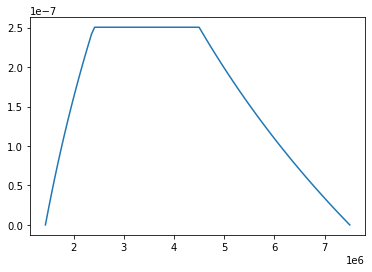

(1.000000001063691, 1.4451704277718136e-08)


In [15]:
rho1 = 1800
rho2 = 3000

cs1 = 800
cs2 = 2500

x = np.linspace(rho1*cs1,rho2*cs2,100)

def densprod(x,cs1_=cs1,cs2_=cs2,rho1_=rho1,rho2_=rho2) :
  return (log(rho2_*cs2_/(rho1_*cs1_)) - abs(log(rho2_*cs1_/x)) - abs(log(rho1_*cs2_/x)))/(2*(rho2_-rho1_)*(cs2_-cs1_))

plt.plot(x,densprod(x))
plt.show()

from scipy.integrate import quad
print(quad(densprod,rho1*cs1,rho2*cs2))


Prior (empirique) du couple de paramètres ($\kappa_e, \alpha_e$) avec les inputs du paper_inversion

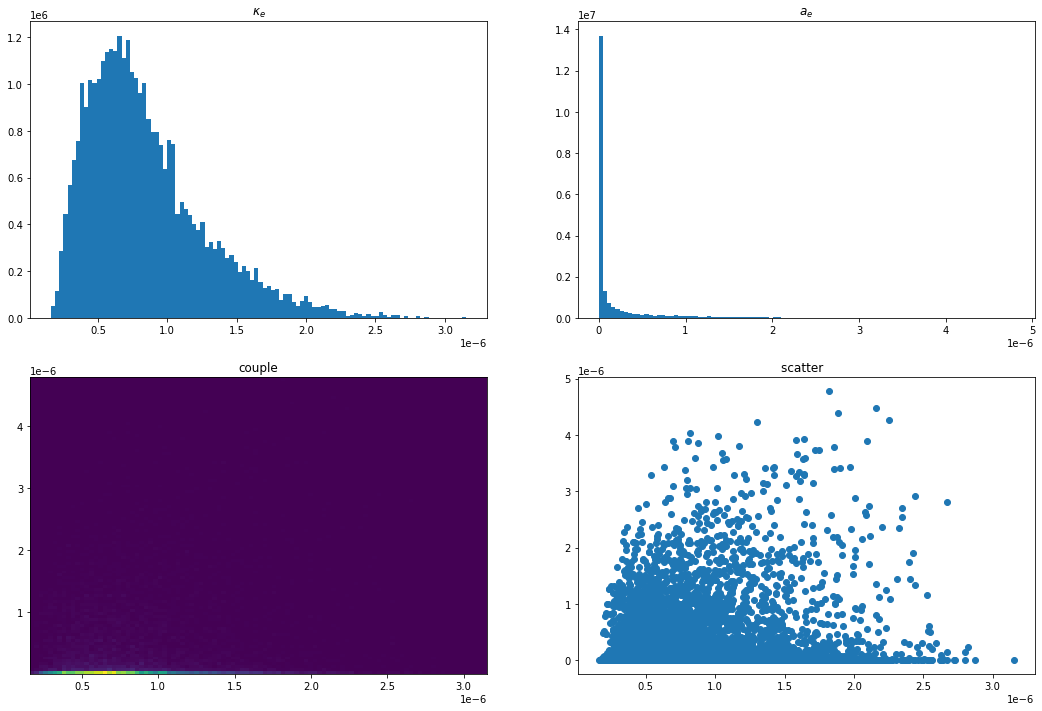

In [3]:
def simu_kappa_alpha(n):
    por = np.random.uniform(.15,.5,n)
    lambda_s = np.random.uniform(1,5,n)
    k = 10**(-np.random.uniform(9,14,n))
    rho_s = np.random.uniform(1800,3000,n)
    c_s = np.random.uniform(800,2500,n)
    kappa_e = (por*np.sqrt(.598) + (1-por)*np.sqrt(lambda_s))**2/(por*10**3*.598 + (1-por)*rho_s*c_s)
    alpha_e = 10**6*.598 * k * 9.81/((por*10**3*.598 + (1-por)*rho_s*c_s)*10**(-3))
    return np.transpose((kappa_e,alpha_e))

n = 10000
params = simu_kappa_alpha(n)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(18, 12))
ax1.set_title("$\kappa_e$")
fig1 = ax1.hist(params[:,0],100,density=True)

ax2.set_title("$ a_e$")
fig2 = ax2.hist(params[:,1],100,density=True)

ax3.set_title("couple")
fig3 = ax3.hist2d(params[:,0],params[:,1],100)

ax4.set_title("scatter  ")
fig4 = ax4.scatter(params[:,0],params[:,1])

plt.show()
